In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
# 1. Simulate Metabolomics Intensity Matrix
np.random.seed(42) # Ensuring reproducibility
# 200 metabolites, 8 samples, intensity range 0-100,000
data = np.random.rand(200, 8) * 1e5

In [ ]:
# 2. Insert missing values
mask = np.random.choice([1, 0], data.shape, p=[0.15, 0.85])
data[mask == 1] = np.nan


In [ ]:
# 3. KNN Imputation
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(data)

In [ ]:
# 4. Log2 transformation
df_log = np.log2(df_imputed + 1)

# # 5. PQN (Probabilistic Quotient Normalization)
# PQN is widely used in urine metabolomics & variable dilution datasets.

In [ ]:
# 6. Scaling Before PCA
scaler = StandardScaler()
scaled = scaler.fit_transform(df_log)

In [ ]:
# 7. PCA Noise Reduction
pca = PCA(n_components=2)
pc = pca.fit_transform(scaled)

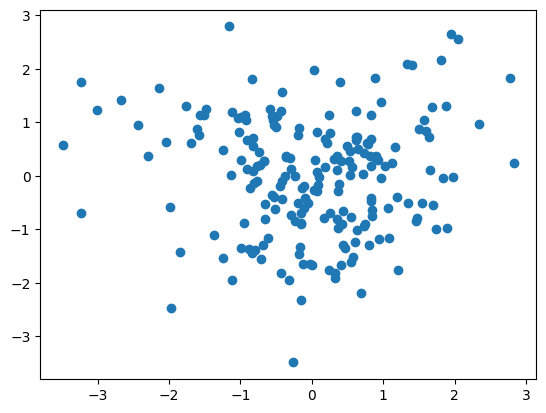

In [ ]:
# 8. PCA Plot
plt.scatter(pc[:, 0], pc[:, 1])

### Interpretation of the PCA Plot

The PCA plot displays the results of Principal Component Analysis on your scaled metabolomics data. Here's a breakdown of what it represents:

*   **Each point represents a sample:** In this scatter plot, every dot corresponds to one of your 8 samples.

*   **Axes are Principal Components (PC1 and PC2):**
    *   The horizontal axis is the first principal component (PC1).
    *   The vertical axis is the second principal component (PC2).
    *   These components are new variables created to capture the maximum variance in your original dataset.

*   **Variance Explained:** PC1 always accounts for the largest possible variance in the data, and PC2 accounts for the second largest variance among the remaining variance, and so on. The exact percentage of variance explained by PC1 and PC2 can be obtained from the `pca.explained_variance_ratio_` attribute, which was not displayed in the current output.

*   **Proximity indicates similarity:** Samples that are close together on the plot are more similar to each other in terms of their metabolomic profiles across the 200 metabolites, after imputation, log-transformation, and scaling.

*   **Distance indicates dissimilarity:** Samples that are far apart are more dissimilar.

*   **Identifying patterns and outliers:**
    *   **Clusters:** If you observe distinct groups of points, this might indicate natural groupings or sub-populations within your samples.
    *   **Outliers:** Points that are very far removed from the main cluster(s) could be potential outliers, suggesting unique metabolomic profiles for those specific samples.

*   **Limitations (from this plot alone):** Without knowing the sample groups (e.g., control vs. treatment), it's difficult to draw specific biological conclusions. However, this plot provides a visual overview of the overall variability and relationships between your samples based on their principal components.

### Final Conclusion: Metabolomics Data Preprocessing and PCA

We have successfully performed a series of essential steps for preprocessing simulated metabolomics intensity matrix data, culminating in a Principal Component Analysis (PCA) plot.

1.  **Data Simulation:** We started by simulating a metabolomics intensity matrix with 200 metabolites and 8 samples, establishing a reproducible dataset.
2.  **Missing Value Introduction:** Deliberate missing values were introduced into the simulated data to mimic real-world scenarios in metabolomics.
3.  **KNN Imputation:** K-Nearest Neighbors (KNN) imputation was applied to estimate and fill in the missing data points, ensuring a complete dataset for further analysis.
4.  **Log2 Transformation:** The imputed data underwent a Log2 transformation (with a +1 offset to handle zero values), which is a common practice to normalize the data distribution and stabilize variance.
5.  **Scaling Before PCA:** The log-transformed data was then scaled using `StandardScaler`. This step is crucial for PCA, as it ensures that variables with larger variances do not disproportionately influence the principal components.
6.  **PCA Noise Reduction:** Principal Component Analysis (PCA) was performed, reducing the dimensionality of the data to two principal components (PC1 and PC2). This step helps in noise reduction and highlighting the most significant variations in the dataset.
7.  **PCA Plot Visualization:** Finally, a scatter plot of PC1 versus PC2 was generated. This plot visually represents the relationships and variability among the 8 samples, allowing for the identification of potential clusters or outliers based on their metabolomic profiles.